In [233]:
#importing libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing 
from xgboost import XGBRegressor
#from sklearn.impute import Imputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import Imputer
from sklearn.model_selection import learning_curve


In [182]:
# reading the files :
train = pd.read_csv("G:/Sapienza/1st semester/FDS/Titanic/train.csv")
test = pd.read_csv("G:/Sapienza/1st semester/FDS/Titanic/test.csv")

In [183]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [184]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [185]:
train.shape

(891, 12)

In [186]:
test.shape

(418, 11)

In [187]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [188]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Features:
1.survival: Survival
2.PassengerId: Unique Id of a passenger
3.pclass: Ticket class
4.sex: Sex
5.Age: Age in years
6.sibsp: # of siblings / spouses aboard the Titanic
7.parch: # of parents / children aboard the Titanic
8.ticket: Ticket number
9.fare: Passenger fare
10.cabin: Cabin number
11.embarked: Port of Embarkation

In [189]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [190]:
test.describe(include = "all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Lundin, Miss. Olga Elida",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


Here we have 2 workflow to be followed :
    First we need to convert categorical data to numerical data , 
    We should work on missing values/Nan values 

In [191]:
#check for any other unusable values
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


We can see that except for the abovementioned missing values, no NaN values exist.

Some Predictions:
Sex: Females are more likely to survive.
SibSp/Parch: People traveling alone are more likely to survive.
Age: Young children are more likely to survive.
Pclass: People of higher socioeconomic class are more likely to survive.

C:\Users\paavai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


% of males survived: 18.890814558058924
% of females survived: 74.20382165605095


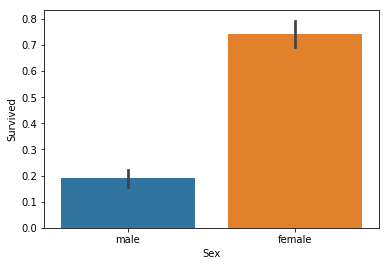

In [192]:
# Visualising data based on sex feature:
# Draw a bar plot between sex and Survived:
sns.barplot(x = "Sex" , y ="Survived" , data = train)
# To find the percentage of males who survived :
print("% of males survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)
#To find the percentage of females who survived:
print("% of females survived:" , train['Survived'][train["Sex"] == "female"] .value_counts(normalize = True)[1]*100)

Here its noted that female has survived more than males. 

% of Pclass1 survived: 62.96296296296296
% of Pclass2 survived: 47.28260869565217
% of Pclass3 survived: 24.236252545824847


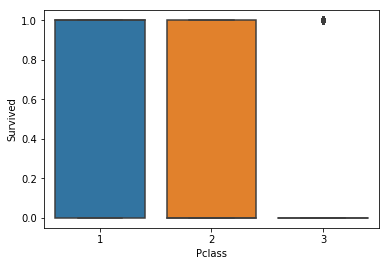

In [193]:
# Finding how the feature "Pclass" is important in prediction:
sns.boxplot(x = "Pclass" , y = "Survived" , data = train)

# here there are 3 pclass , so finding the percentage of each pclass:
print("% of Pclass1 survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)
print("% of Pclass2 survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)
print("% of Pclass3 survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)


Here , we find that Pclass 3 has less survival % compared to rest two

% of SibSp0 survived: 34.53947368421053
% of SibSp1 survived: 53.588516746411486
% of SibSp2 survived: 46.42857142857143


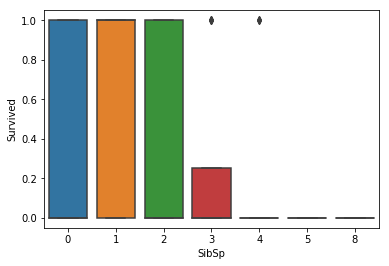

In [194]:
# Finding how the feature "SibSp" is important in prediction:
sns.boxplot(x="SibSp" , y = "Survived" , data = train)

#Here we are considering the counts , where there are 1 or 2 siblings or wives :
print("% of SibSp0 survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)
print("% of SibSp1 survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)
print("% of SibSp2 survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

In general, it's clear that people with more siblings or spouses aboard were less likely to survive. However, contrary to expectations, people with no siblings or spouses were less to likely to survive than those with one or two. 

% of Parch0 survived: 34.365781710914455
% of Parch1 survived: 55.08474576271186
% of Parch2 survived: 50.0
% of Parch3 survived: 60.0


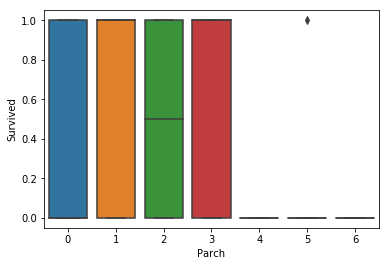

In [195]:
# Finding how the feature "Parch" is important in prediction:
sns.boxplot(x="Parch" , y = "Survived" , data = train)

#Here we are considering the counts , where there are 0 or 3 parents or children :
print("% of Parch0 survived:", train["Survived"][train["Parch"] == 0].value_counts(normalize = True)[1]*100)
print("% of Parch1 survived:", train["Survived"][train["Parch"] == 1].value_counts(normalize = True)[1]*100)
print("% of Parch2 survived:", train["Survived"][train["Parch"] == 2].value_counts(normalize = True)[1]*100)
print("% of Parch3 survived:", train["Survived"][train["Parch"] == 3].value_counts(normalize = True)[1]*100)

People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those with 1-3 parents or children.

This plot looks inappropriate , hence we can divide the plot with labels based on the age group

C:\Users\paavai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


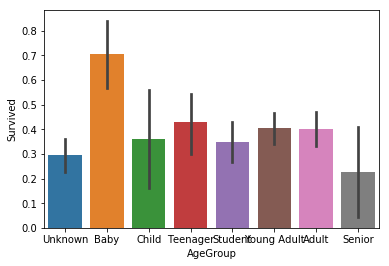

In [196]:
# age feature:
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

Babies are more likely to survive than any other age group.

C:\Users\paavai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


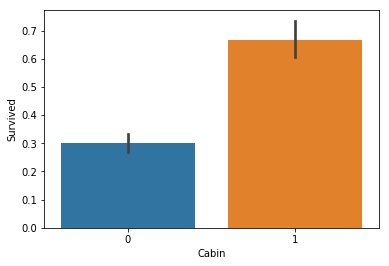

In [197]:
# Cabin feature:
# since cabin has nan values and alphanumeric values(C123,C103 etc) , we are converting all the values to int type
train["Cabin"] = (train["Cabin"].notnull().astype('int'))
test["Cabin"] = (test["Cabin"].notnull().astype('int'))

#calculate percentages of CabinBool vs. survived
#print("Percentage of CabinBool = 1 who survived:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

#print("Percentage of CabinBool = 0 who survived:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
#draw a bar plot of CabinBool vs. survival
sns.barplot(x="Cabin", y="Survived", data=train)
plt.show()

People with a Cabin number 1, more likely to survive. 

In [198]:
# data cleaning of test dataset:
test.describe(include = "all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,418.000000,418,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,NaN,3,8
top,NaN,NaN,"Lundin, Miss. Olga Elida",male,NaN,NaN,NaN,PC 17608,NaN,NaN,S,Young Adult
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,NaN,270,96
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,0.217703,NaN,NaN
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,0.413179,NaN,NaN
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,0.000000,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,0.000000,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,0.000000,NaN,NaN


we have totally 418 passengers , and we need to remove certain features to get which arent important

In [199]:
# removing "Ticket" and "Cabin" features from train and test dataset:
train = train.drop(["Ticket"], axis =1)
train = train.drop(["Cabin"], axis =1)
test = test.drop(["Ticket"], axis =1)
test = test.drop(["Cabin"], axis =1)

In [200]:
# filling the "Embarked" feature(S,C,Q) with 0
southampton = train[train["Embarked"] == "S"].shape
print(southampton )
cherbourg = train[train["Embarked"] == "C"].shape
print(cherbourg)
queenstown = train[train["Embarked"] == "Q"].shape
print(queenstown)

(644, 11)
(168, 11)
(77, 11)


It's evident , that majority of people are embarked over "Southampton" , hence we will fill the missing values over there.


In [201]:
train = train.fillna({"Embarked": "S"})

In [202]:
#create a combined group of both datasets to find the title :
combine = [train, test]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [203]:
#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare') # replacing those titles with rare
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal') # replacing these titles with royal
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss') # replacing these titles with miss
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss') # replacing these titles with miss
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs') # replacing these titles with mrs

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [204]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,1


In [205]:
# fill missing age with mode age group for each title
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

In [206]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

#dropping the Age feature for now, might change
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

In [207]:
#drop the name feature since it contains no more useful information.
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [208]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)



In [209]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)


In [210]:
#fill in missing Fare value in test set based on mean fare for that Pclass , since fare has float datatype:
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        
#map Fare values into groups of numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

C:\Users\paavai\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [211]:
# After cleaning all the values :
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
0,1,0,3,0,1,0,1,4,1,1
1,2,1,1,1,1,0,2,6,3,4
2,3,1,3,1,0,0,1,5,2,2
3,4,1,1,1,1,0,1,5,3,4
4,5,0,3,0,0,0,1,5,1,2


In [212]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
0,892,3,0,0,0,3,5,1,1
1,893,3,1,1,0,1,6,3,1
2,894,2,0,0,0,3,7,1,2
3,895,3,0,0,0,1,5,1,2
4,896,3,1,1,1,1,4,3,2


In [235]:
# Splitting the model :
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [236]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

79.7


In [237]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

82.23


In [238]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

82.23


In [239]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

83.25


In [240]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

77.66


In [241]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

78.68


In [242]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

81.73


In [243]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

77.66


In [244]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

78.17


In [245]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

79.7


In [246]:
#from sklearn.impute import SimpleImputer
#my_pipeline = make_pipeline(SimpleImputer(),
                            #XGBRegressor(learning_rate=0.1, n_estimators=100))

#def train_and_evaluate(X, y):
   # train_sizes, train_scores, cv_scores = learning_curve(my_pipeline, X, y, scoring='neg_mean_squared_error', cv=3)
    #train_rmse = (-1 * train_scores.mean(1)) ** .5
    #cv_rmse = (-1 * cv_scores.mean(1)) ** .5
    #df_learning_curve = pd.DataFrame({"Train Sizes" : train_sizes,
                                      "Train RMSE" : train_rmse,
                                      "CV RMSE" : cv_rmse})
    #return df_learning_curve

IndentationError: unexpected indent (<ipython-input-246-a6c30c7dab62>, line 3)

In [247]:
# submission
#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions = gbk.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)